#Assignment 1: Logistic Regression

## Dataset load & Plot

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

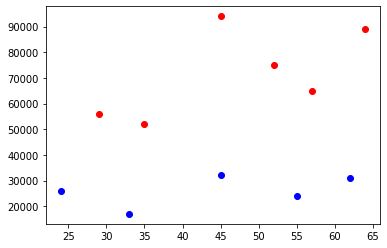

In [8]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [9]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression

    # w: coefficient of the model to input features,
    # b: bias of the model

    lr = LogisticRegression(C=100.0, random_state=0)
    lr.fit(X, y)

    return lr.coef_[0], lr.intercept_[0]

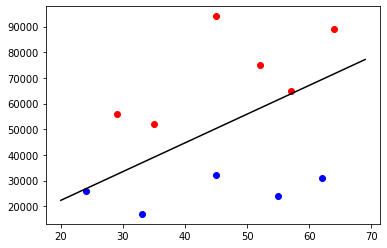

In [10]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [11]:
from scipy.special import xlogy

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_pred, target):
  
  # finfo: float로 표현가능한 수의 한계
  # eps: 표현 가능한 가장 작은 값
  eps = np.finfo(y_pred.dtype).eps

  # 0보다 작은 수는 0으로 변환(배열, 최소값 기준, 최대값 기준)
  y_pred = np.clip(y_pred, eps, 1-eps)

  # 위 두개 안해주면 nan, inf, -inf이 나와서 계산이 제대로 안이루어짐..
  return -np.mean((target * np.log(y_pred) + (1 - target) * np.log(1 - y_pred)))

def learn_and_return_weights_numpy(X, Y, lr=0.1, iter=100000):
  N, features = X.shape

  w = np.zeros(features)
  b = 0

  for i in range(iter):
    z = np.dot(X, w) + b
    pred = sigmoid(z)

    # binary cross entropy로 loss 구하기
    err = binary_cross_entropy_loss(pred, Y)

    # 실제 값과 예측 값의 차이
    diff = pred - Y

    # weight, bias 업데이트
    dw = np.dot(diff, X) / N
    db = np.sum(diff) / N
    w -= dw * lr
    b -= db * lr

    if i % 1000 == 0:
        print(err)
  return w, b

0.6931471805599453
19.66017457588208
16.38347881323507
16.38347881323507
19.66017457588208
16.38347881323507
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.2204460492503136e-16
2.220446049250313

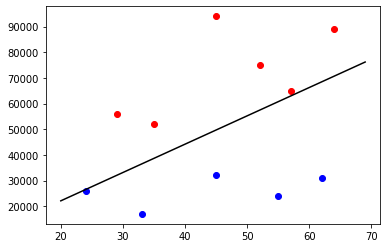

In [12]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)